In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
print(os.getcwd())
os.chdir('./../')
print(os.getcwd())

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2\enunciados
c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\Practica2


# Escalado en estaciones
Aplicación de transformaciones de variables para analizar los datos de estaciones.

El escalado tiene como objetivo obtener generalizaciones mejores en el modelado.

In [5]:
dfe = pd.read_csv('./data/interim/estaciones.csv')
dfe.tail()

,number,uso_bici,address,lat,lon,total,nombre,coddistrit,codbarrio
268,272,673,Vicente la Roda - Ingeniero Fausto Elio,39.480623,-0.332190,15,LA MALVA-ROSA,11,3
269,273,340,Moraira - Alta del Mar,39.450305,-0.333272,15,NATZARET,11,5
270,274,216,San Francisco de Paula - Castell de Pop,39.448070,-0.333188,15,NATZARET,11,5
271,275,418,Moreras - Rona de Nazaret,39.452305,-0.335065,20,LA PUNTA,10,6
272,276,1029,Veles e Vents,39.461975,-0.323765,20,EL GRAU,11,1


[Preprocesamiento con Scikitlearn, escalado lineal, no lineal, tranformaciones, codificación de categorías](https://qu4nt.github.io/sklearn-doc-es/modules/preprocessing.html#preprocessing-data)

La normalización lineal uniforme: $v' = \frac{v - \min}{\max - \min}$ es un ejemplo en el que los datos pasan a estar entre 0 y 1.

In [6]:
atributo = 'uso_bici'
# Ejemplo de normalización
dfe[f"{atributo}_norm"] = (dfe[atributo] - dfe[atributo].min()) / (dfe[atributo].max() - dfe[atributo].min())
# Ejemplo transformaciones
dfe[f"{atributo}_normed"] = (dfe[atributo] - dfe[atributo].mean())
dfe[f"{atributo}_tip"] = (dfe[atributo] - dfe[atributo].mean()) / dfe[atributo].std()
dfe[f"{atributo}_sqrt"] = np.sqrt(dfe[atributo])
dfe[f"{atributo}_pow"] = np.pow(dfe[atributo], 2)

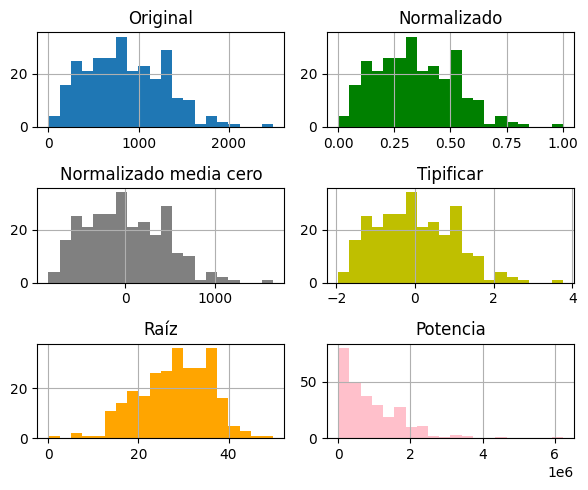

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(6, 5))
axs = ax.flatten()
ax = dfe[atributo].hist(bins=20, ax=axs[0])
ax.set_title('Original')
ax = dfe[f"{atributo}_norm"].hist(bins=20, ax=axs[1], color='g')
ax.set_title('Normalizado')
ax = dfe[f"{atributo}_normed"].hist(bins=20, ax=axs[2], color='gray')
ax.set_title('Normalizado media cero')
ax = dfe[f"{atributo}_tip"].hist(bins=20, ax=axs[3], color='y')
ax.set_title('Tipificar')
ax = dfe[f"{atributo}_sqrt"].hist(bins=20, ax=axs[4], color='orange')
ax.set_title('Raíz')
ax = dfe[f"{atributo}_pow"].hist(bins=20, ax=axs[5], color='pink')
ax.set_title('Potencia')
fig.tight_layout()
plt.show()

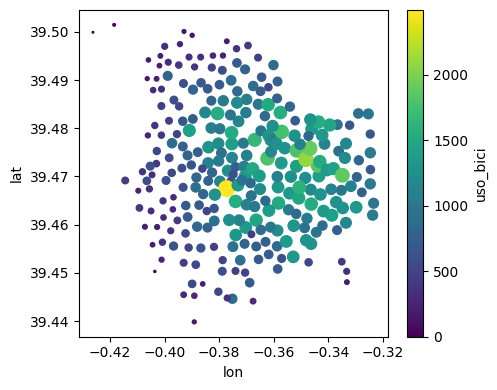

In [8]:
# Revisamos las unidades
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = ax.scatter(dfe[x_feat], dfe[y_feat], 
                s=(dfe[size]*0.05), c=dfe[size], cmap='viridis')
plt.ylabel(y_feat)
plt.xlabel(x_feat)
fig.tight_layout()
cbar = plt.colorbar(ax)
cbar.set_label(size)
plt.show()

In [9]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
# Trabajamos con la librería scikit-learn
prep_scaling = preprocessing.MinMaxScaler()
# prep_scaling = preprocessing.Normalizer("l1")
# prep_scaling = preprocessing.StandardScaler()
# prep_scaling = preprocessing.MaxAbsScaler()
# prep_scaling = preprocessing.RobustScaler()
# prep_scaling = preprocessing.QuantileTransformer(n_quantiles=6)

# Primero se entrena/ajusta el transformador
transf = prep_scaling.fit(dfe.loc[:, [x_feat, y_feat, size]].values)

# Luego se transforman los datos
data_transf = transf.transform(dfe.loc[:, [x_feat, y_feat, size]].values)

# Creamos el dataframe con el resultado
df2gm = pd.DataFrame(data_transf, 
                     columns=[x_feat, y_feat, size])
df2gm.head()

,lon,lat,uso_bici
0,0.421284,0.652642,0.432237
1,0.452208,0.650161,0.400962
2,0.446958,0.600597,0.482759
3,0.495042,0.599169,0.561748
4,0.535893,0.601571,0.399358


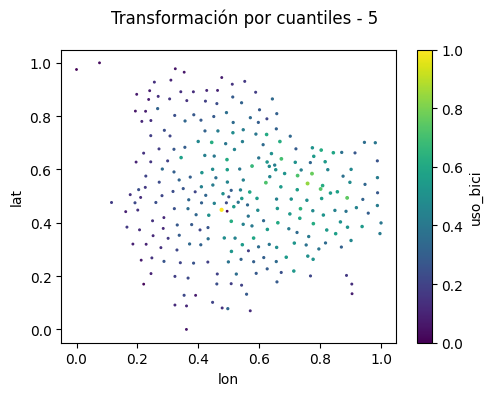

In [10]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = ax.scatter(df2gm[x_feat], df2gm[y_feat], 
                s=(df2gm[size]+1)**2, c=df2gm[size],
                cmap='viridis')
fig.suptitle("Transformación por cuantiles - 5")
plt.ylabel(y_feat)
plt.xlabel(x_feat)
fig.tight_layout()
cbar = plt.colorbar(ax)
cbar.set_label(size)
plt.show()

c:\Users\ghost\OneDrive\PC_Casa\Ciencia_Datos_IA\2024-2025\2n Cuatri\Introducción a la Ciencia de Datos\Actividades\Portfolio\.venv\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


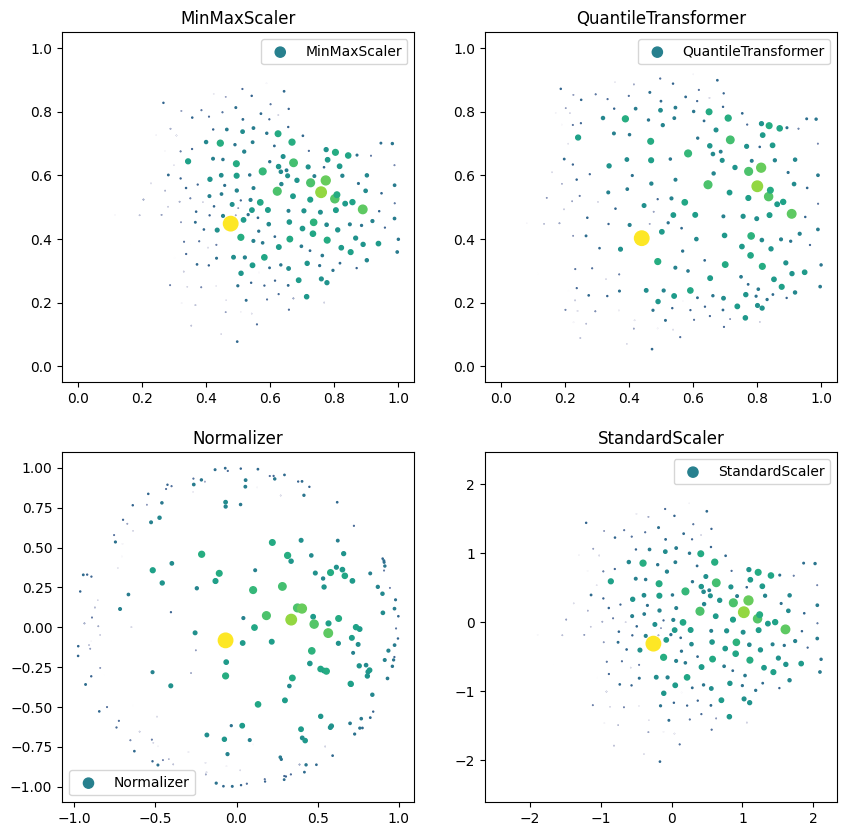

In [11]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
# Definir el parámetro de quantiles
quantile_scaler = preprocessing.QuantileTransformer(n_quantiles=5)
normalizer = preprocessing.Normalizer()
dfe[[x_feat, y_feat, size]] = standard_scaler.fit_transform(dfe[[x_feat, y_feat, size]].values)
minmax_data = min_max_scaler.fit_transform(dfe[[x_feat, y_feat, size]].values)
quantile_data = quantile_scaler.fit_transform(dfe[[x_feat, y_feat, size]].values)
normalize_data = normalizer.fit_transform(dfe[[x_feat, y_feat, size]].values)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
multip = 3
# Plot the data on each subplot
axs[0, 0].scatter(minmax_data[:,0], minmax_data[:,1],
                  label='MinMaxScaler', s=(dfe[size]+1)**multip, 
                  c=dfe[size], cmap='viridis')
axs[0, 0].set_title('MinMaxScaler')
axs[0, 0].legend()

axs[0, 1].scatter(quantile_data[:,0], quantile_data[:,1], 
                  label='QuantileTransformer', s=(dfe[size]+1)**multip, 
                  c=dfe[size], cmap='viridis')
axs[0, 1].set_title('QuantileTransformer')
axs[0, 1].legend()

axs[1, 0].scatter(normalize_data[:,0], normalize_data[:,1], 
                  label='Normalizer', s=(dfe[size]+1)**multip, 
                  c=dfe[size], cmap='viridis')
axs[1, 0].set_title('Normalizer')
axs[1, 0].legend()

# Original data in yellow is plotted on the last subplot
axs[1, 1].scatter(dfe['lon'], dfe['lat'], label='StandardScaler', 
                  s=(dfe[size]+1)**multip, c=dfe[size], cmap='viridis')  
axs[1, 1].set_title('StandardScaler')
axs[1, 1].legend()

plt.show()

In [ ]:
df.to_csv('./data/processed/usobarriosmeteo.csv', index=False)

# Uso de bicis
En el dataset objetivo "usobarriosmeteo.csv" vamos a transformar los datos para ampliar características.
> Hipótesis: la hora del día puede ser un factor que defina el comportamiento del cliente según la zona de la ciudad

In [ ]:
df = pd.read_csv('./data/interim/usobarriosmeteo.csv')
df.tail()

In [ ]:
# Transformar a datetime si no tiene el tipo 
df.dtypes

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['hora'] = pd.to_datetime(df['fecha']).dt.hour
df['dia'] = pd.to_datetime(df['fecha']).dt.day
df['mes'] = pd.to_datetime(df['fecha']).dt.month
df['anio'] = pd.to_datetime(df['fecha']).dt.year
df['dia_nombre'] = pd.to_datetime(df['fecha']).dt.day_name()
# Monday=0, Sunday=6
df['dia_semana'] = df['fecha'].dt.day_of_week
df['findesemana'] = np.where(df['dia_semana']>4, 1, 0)

In [ ]:
df.columns

In [ ]:
df['dia_nombre'].value_counts()

In [ ]:
df.to_csv('./data/processed/usobarriosmeteo.csv', index=False)

# Conclusiones
- Se tiene exploran las opciones para transformar datos
- El escalado puede ser útil para datos con unidades muy dispares
- La extracción de características puede mejorar el aprendizaje automático